# Part II - Factors affecting the Loan Status- Prosper Loan Data
## by Kazeem Fatai

<!-- >**Before you start**: You must have the README.md file ready that include a summary of main findings that reflects on the steps taken during the data exploration (Part I notebook). The README.md file should also describes the key insights that will be conveyed by the explanatory slide deck (Part II  outcome)
 -->


## Investigation Overview

> About half of the loans are currently on with only about 30% completed. Only a few loans have the best risk score but a good percentage of all the loans have good risk rating. Most of the loans have their length to be 3 years. The variables listed above are the focus of this presentation and interestingly, have a relationhip with the interest rate and loan amount. The median of the interest rate decreases as the prosper score improves and lower interest rates are associated with Loans with better Prosper Ratings. This indicates the close relationship between the prosper score and prosper rating. A high percentage of loans whose term is 1 year are completed already. Firstly, a look at the distribution of these variables will help understand how each categorical and non categorical variables spread through out the entire dataset. Next, i aim to show how the ProsperRating and Score affects the interest rate. The status of the loan has some characteristics  which i will be explaining in this slide deck.

<!-- > Describe the overall goals of your presentation here. Add a summary of key insights at the start of the notebook, just as you added in the README.md. This will help your notebook to stay aligned to the key insights you want to include in your slide deck.

> **Rubric Tip**: The key insights in the slideshow must match those documented in the README.md summary. 
 -->

## Dataset Overview

> This dataset contains 113937 samples of 21 variables. With different data types for the different variables, this data contains records for a loan Company - Prosper. Some of these records are but not limited to the interest rate, loan status, the risk score of each loan and information concerning the borrower.

In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [3]:
# load in the dataset into a pandas dataframe
loan_clean = pd.read_csv("loan_clean.csv")

loan_upper = pd.read_csv("loan_upper.csv")

> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## Loan Amount Distribution

> *The loan amount distribution shows the frequency of borrowers across the different loan amounts taken. It appears that most loan amouts are in the multiple of 5000 USD as there were spikes at these values on the plot*  




<!-- > **Rubric Tip**: Provide at least 3 **polished** visualizations to convey key insights. The total number of visualizations in the slideshow shoould be less than 50% of the number of visualizations in the exploratory analysis. For example, if the exploratory analysis (Part I) has 18 visualizations, the slideshow can have (3 - 8) visualizations. 


> **Rubric Tip**: Each visualization in the slideshow is associated with **descriptive comments** that accurately depict their purpose and your observation. 


> **Rubric Tip**: All plots in the slideshow are appropriate, meaning the plot type, encodings, and transformations are suitable to the underlying data. 

> **Rubric Tip**: All plots in the slideshow are polished, meaning all plots have a title, labeled x/y axes (with units), x/y ticks, and legends.  -->

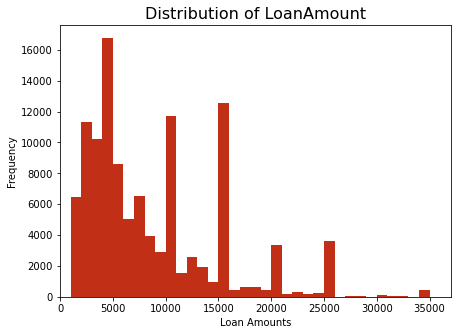

In [4]:
#define the function that plots an histogram showing the data distribution
def plot_func(column, title, binsize):#title is the proposed 
                                    #title of the chart and binsize specifies the size of the bins in the column
    bins = np.arange(loan_clean[column].min(), loan_clean[column].max()+binsize, binsize)

    loan_clean[column].plot(kind = 'hist', figsize = (7,5), color = "#C13016", bins = bins);#plots a bar chart 
    
    plt.title(label = title, fontsize = 16);#prints the title 
    
    #applying the user defined function to my dataset
plot_func('LoanOriginalAmount', 'Distribution of LoanAmount', 1000)

#set the xlabel
plt.xlabel('Loan Amounts');
plt.xlim(0, 37000);

## Borrower Rate Distribution Across the Dataset 
> It can be seen how values between 0.30% and 0.40% reached peak values but interest rate 0.1-0.2% also shows a very high frequency of loans. There are very few number of loans with very low interest rate.

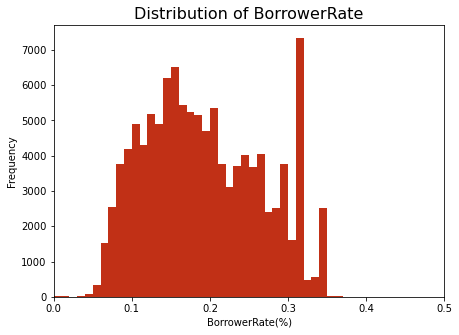

In [5]:
#applying the function to the BorrowerRate Column
plot_func('BorrowerRate', 'Distribution of BorrowerRate',0.01)

plt.xlabel("BorrowerRate(%)");
plt.xlim(0, 0.5);

## The relationship between The Borrower Rate and Loan amount taken

> The Loan amount does not have a linear relationship with the interest rate as loans of the same amount have different interest rates
Further investigation shows that the Prosper Rating has an impact on the interest rate as the best ratings get lower interest rates and the worst ratings get very high interest rate 

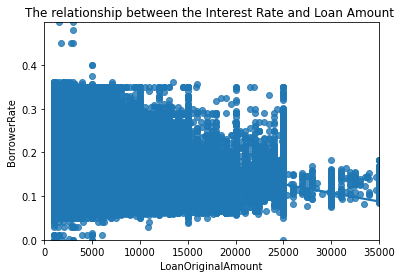

In [6]:
#using seaborn regplot, i want to find the relationship btw the two variables
sb.regplot(data = loan_clean, y = 'BorrowerRate', x = 'LoanOriginalAmount', x_jitter = 0.2);

#set the title
plt.title("The relationship between the Interest Rate and Loan Amount ");

#sets the limit of both axis
plt.xlim(0,loan_clean['LoanOriginalAmount'].max());
plt.ylim(0, loan_clean['BorrowerRate'].max());

## Impact of Prosper Rating on The relationship between BorrowerRate and LoanAmount

> 
The Prosper Rating has an impact on the interest rate as the best ratings get lower interest rates and the worst ratings get very high interest rate 

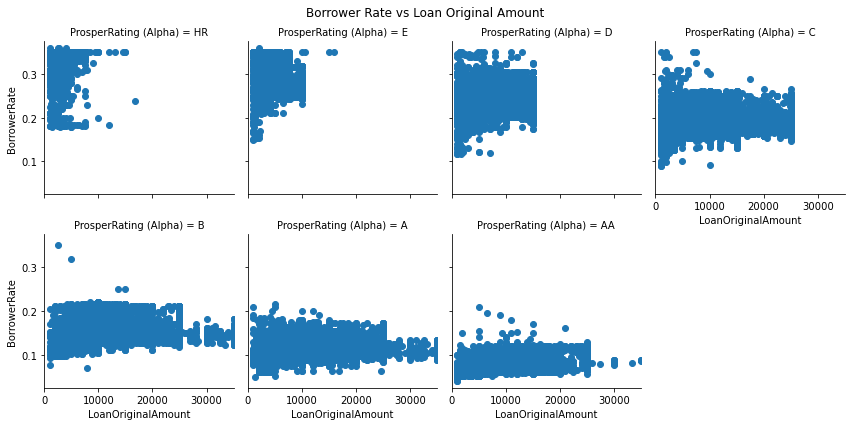

In [7]:
ordinal_var_dict = ['HR','E','D','C', 'B', 'A', 'AA']

# Create faceted scatter plot on levels of Prosper Rating
g = sb.FacetGrid(data = loan_clean, col = 'ProsperRating (Alpha)', col_wrap=4, col_order = ordinal_var_dict )
g.map(plt.scatter, 'LoanOriginalAmount', 'BorrowerRate')
g.add_legend()
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('Borrower Rate vs Loan Original Amount');

plt.xlim(0,loan_clean['LoanOriginalAmount'].max());

>**Generate Slideshow**: Once you're ready to generate your slideshow, use the `jupyter nbconvert` command to generate the HTML slide show. . From the terminal or command line, use the following expression.

In [9]:
!jupyter nbconvert Part_II_slide_deck.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] Converting notebook Part_II_slide_deck.ipynb to slides
[NbConvertApp] Writing 689268 bytes to Part_II_slide_deck.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\Scripts\jupyter-nbconvert-script.py", line 10, in <module>
    sys.exit(main())
  File "C:\ProgramData\Anaconda3\lib\site-packages\jupyter_core\application.py", line 269, in launch_instance
    return super().launch_instance(argv=argv, **kwargs)
  File "C:\ProgramData\Anaconda3\lib\site-packages\traitlets\config\application.py", line 846, in launch_instance
    app.start()
  File "C:\ProgramData\Anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 369, in start
    self.convert_notebooks()
  File "C:\ProgramData\Anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 541, in convert_notebooks
    self.convert_single_notebook(notebook_filename)
  File "C:\ProgramData\

> This should open a tab in your web browser where you can scroll through your presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent slide. Make sure you remove all of the quote-formatted guide notes like this one before you finish your presentation! At last, you can stop the Kernel. 